O presente estudo tem como objetivo analisar a influência das variáveis no risco de inadimplência através das informações disponibilizadas pelo Lending Club, clube sediado em São Francisco EUA onde pessoas físicas podem emprestar dinheiro uma às outras, o tratamento da análise preditiva nas informações é de vital importância para sobrevivência da compania. 
Analisaremos as variáveis que a empresa trabalha em seu modelo preditivo, quais podem ser usadas em levantamento de dados para análise de empresas brasileiras e quais podemos incluir tendo em vista a realidade do mercado brasileiro. 

loan_amnt= valor do empréstimo
installment= prestações
grade = risco de crédito do cliente
employee length = tempo que a pessoa está empregada 
loan_status = se o empréstimo foi pago ou não 
purpose = próposito para o qual a pessoa está pegando o empréstimo 


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('loan.csv', low_memory=False)

In [3]:
dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [5]:
#verificação de valores nulos 
dataset_null = pd.DataFrame({'Count': dataset.isnull().sum(), 'Percent': 100*dataset.isnull().sum()/len(dataset)})
dataset_null[dataset_null['Count'] > 0] 

,Count,Percent
emp_title,51462,5.799326
emp_length,44825,5.051393
annual_inc,4,0.000451
desc,761351,85.797726
title,152,0.017129
delinq_2yrs,29,0.003268
earliest_cr_line,29,0.003268
inq_last_6mths,29,0.003268
mths_since_last_delinq,454312,51.197065
mths_since_last_record,750326,84.555303


In [6]:
#vamos retirar as colunas onde há mais de 80% de valores nulos, o que irá prejudicar a análise
df1 = dataset.dropna(axis=1, thresh=int(0.80*len(dataset)))

In [7]:
dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#total das operações
dataset['loan_amnt'].count()

887379

In [9]:
#soma do valor total emprestado
dataset['loan_amnt'].sum()

13093511950.0

Text(0, 0.5, 'Quantidade de operações')

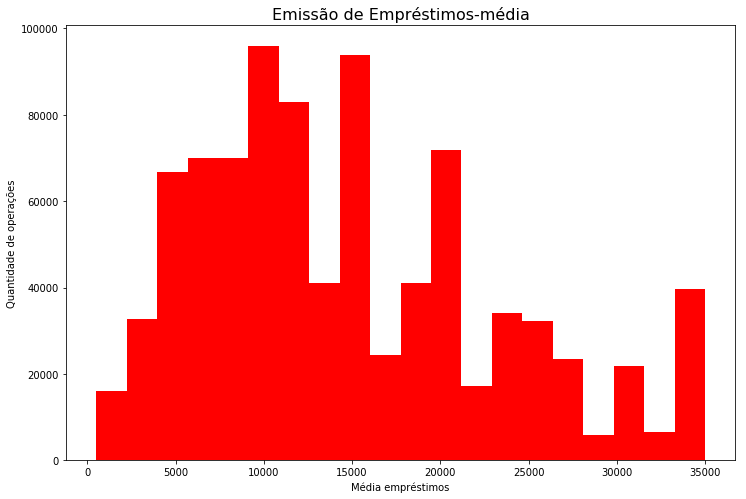

In [10]:
plt.figure(figsize=(12,8))
plt.hist('loan_amnt', data=dataset, color='r', bins=20)
plt.title('Emissão de Empréstimos-média', fontsize=16)
plt.xlabel('Média empréstimos')
plt.ylabel('Quantidade de operações')

In [11]:
#selecionando apenas as colunas necessárias para análise
df_LC = dataset.filter(['loan_amnt', 'term', 'int_rate','installment','grade','sub_grade','emp_length','home_ownership',
                    'annual_inc','verification_status','purpose','dti','delinq_2yrs','loan_status'])
df_LC.dtypes

loan_amnt              float64
term                    object
int_rate               float64
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
purpose                 object
dti                    float64
delinq_2yrs            float64
loan_status             object
dtype: object

In [12]:
df_LC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 14 columns):
loan_amnt              887379 non-null float64
term                   887379 non-null object
int_rate               887379 non-null float64
installment            887379 non-null float64
grade                  887379 non-null object
sub_grade              887379 non-null object
emp_length             842554 non-null object
home_ownership         887379 non-null object
annual_inc             887375 non-null float64
verification_status    887379 non-null object
purpose                887379 non-null object
dti                    887379 non-null float64
delinq_2yrs            887350 non-null float64
loan_status            887379 non-null object
dtypes: float64(6), object(8)
memory usage: 94.8+ MB


In [13]:
#investigando o motivo pelo qual a pessoa solicitou o empréstimo
dataset['purpose'].value_counts()

debt_consolidation    524215
credit_card           206182
home_improvement       51829
other                  42894
major_purchase         17277
small_business         10377
car                     8863
medical                 8540
moving                  5414
vacation                4736
house                   3707
wedding                 2347
renewable_energy         575
educational              423
Name: purpose, dtype: int64

In [14]:
proposito = dataset.groupby('purpose').agg('count')

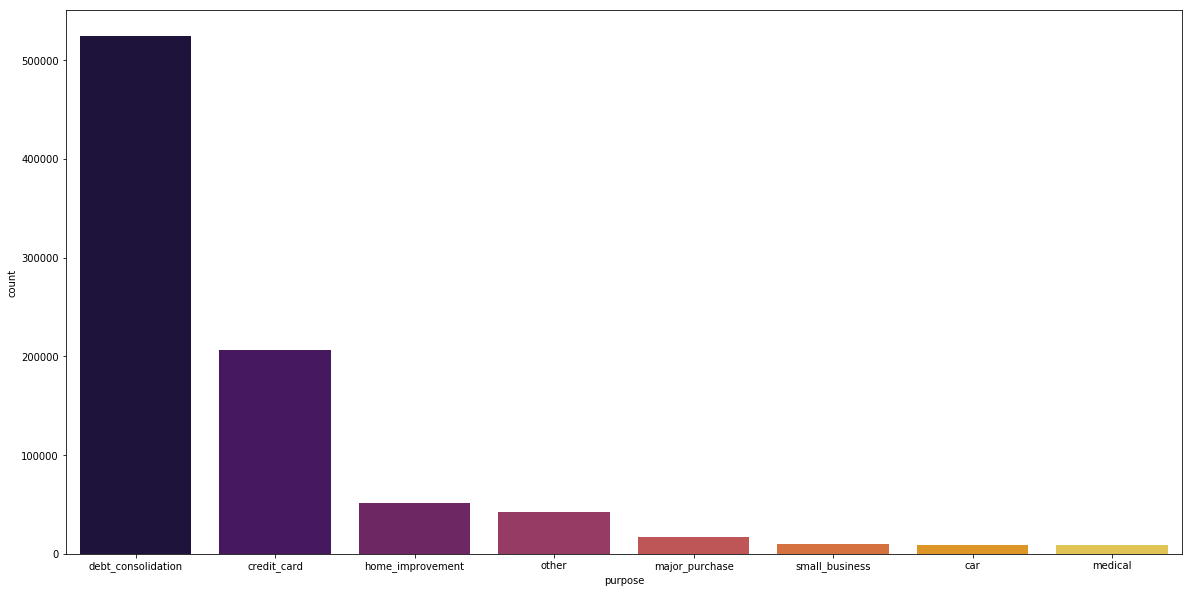

In [15]:
sns.countplot(x='purpose', data=dataset, palette='inferno', order= dataset.purpose.value_counts().iloc[:8].index)
fig = plt.gcf()
fig.set_size_inches(20,10)

In [16]:
#debt_consolidation é uma combinação de múltiplos débitos, como uma renegociação, envolvendo diferentes tipos de débito, é 
#grande maioria do próposito dos empréstimos realizados pelo Lending Club. 

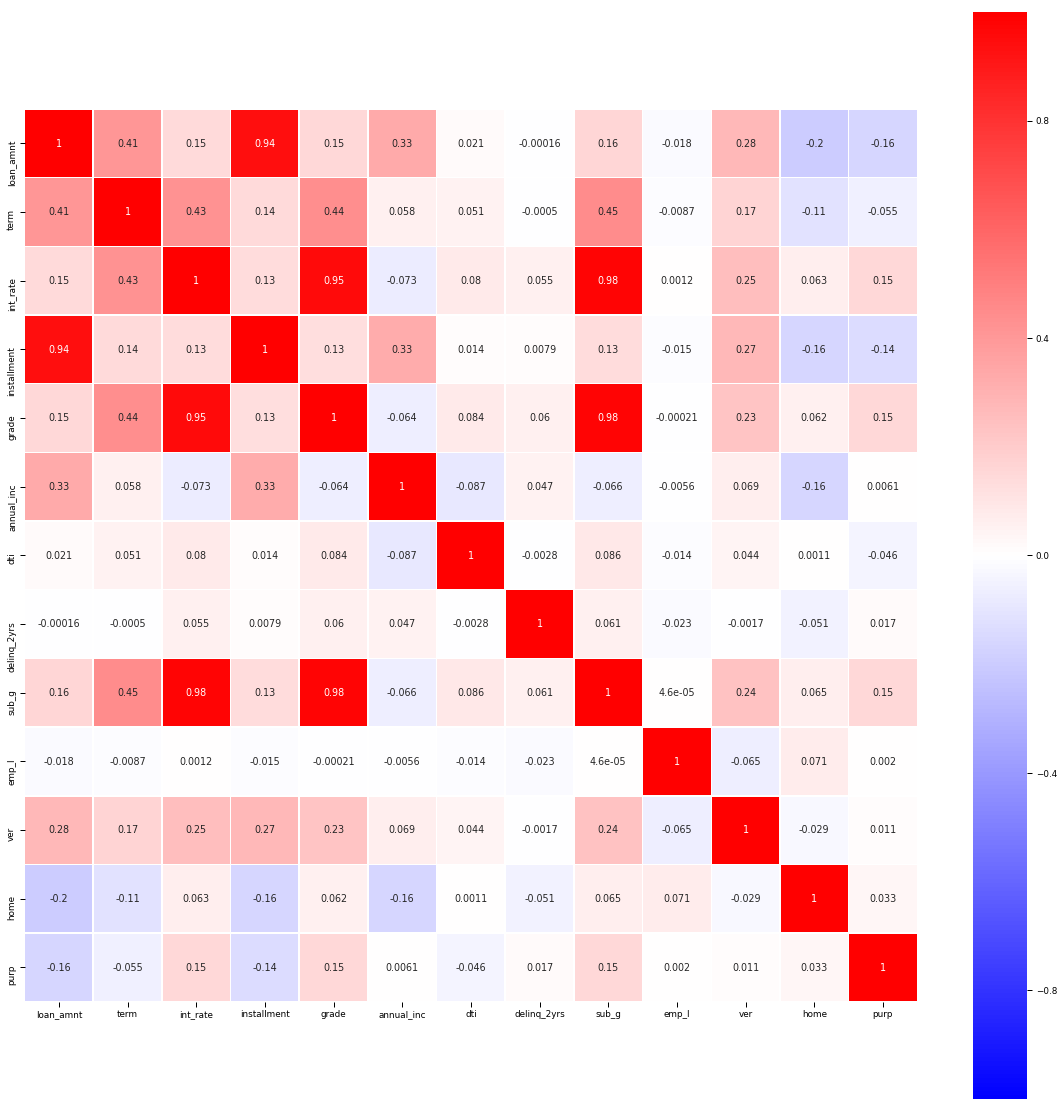

In [17]:
#investigando a correlação entre as variáveis
plt.figure(figsize=(20,20))
sns.set_context("paper", font_scale=1) 
sns.heatmap(df_LC.assign(grade=df_LC.grade.astype('category').cat.codes,
                         sub_g=df_LC.sub_grade.astype('category').cat.codes,
                         term=df_LC.term.astype('category').cat.codes,
                        emp_l=df_LC.emp_length.astype('category').cat.codes,
                         ver =df_LC.verification_status.astype('category').cat.codes,
                        home=df_LC.home_ownership.astype('category').cat.codes,
                        purp=df_LC.purpose.astype('category').cat.codes).corr(), 
                         annot=True, cmap='bwr',vmin=-1, vmax=1, square=True, linewidths=0.5)

Podemos ver pelo gráfico acima que o valor do empréstimo e as prestações tem uma grande correlação (0.94). O que é intuitivo, pois um valor alto de empréstimo pessoal necessita de tempo extra para ser pago. Taxa de juros e risco de crédito também tem uma grande correlação, pois as taxas são decididas pelo risco do crédito e do cliente. Vamos retirar essas três variáveis, para uma visão com menos critérios óbvios, dando melhor perspectiva.

In [18]:
df_LC.drop(['installment','grade','sub_grade','verification_status','term']
           , axis=1, inplace = True)

In [19]:
#mostrando a contagem e valores nulos no dataframe
dflc_null = pd.DataFrame({'Count': df_LC.isnull().sum(), 'Percent': 100*df_LC.isnull().sum()/len(df_LC)})
dflc_null[dflc_null['Count'] > 0]

,Count,Percent
emp_length,44825,5.051393
annual_inc,4,0.000451
delinq_2yrs,29,0.003268


In [20]:
#retirando as colunas nulas já que temos quantidade suficiente de data e não há necessidade de se preencher os valores nulos. 
df_LC.dropna(axis=0)

,loan_amnt,int_rate,emp_length,home_ownership,annual_inc,purpose,dti,delinq_2yrs,loan_status
0,5000.0,10.65,10+ years,RENT,24000.00,credit_card,27.65,0.0,Fully Paid
1,2500.0,15.27,< 1 year,RENT,30000.00,car,1.00,0.0,Charged Off
2,2400.0,15.96,10+ years,RENT,12252.00,small_business,8.72,0.0,Fully Paid
3,10000.0,13.49,10+ years,RENT,49200.00,other,20.00,0.0,Fully Paid
4,3000.0,12.69,1 year,RENT,80000.00,other,17.94,0.0,Current
5,5000.0,7.90,3 years,RENT,36000.00,wedding,11.20,0.0,Fully Paid
6,7000.0,15.96,8 years,RENT,47004.00,debt_consolidation,23.51,0.0,Current
7,3000.0,18.64,9 years,RENT,48000.00,car,5.35,0.0,Fully Paid
8,5600.0,21.28,4 years,OWN,40000.00,small_business,5.55,0.0,Charged Off
9,5375.0,12.69,< 1 year,RENT,15000.00,other,18.08,0.0,Charged Off


In [21]:
#apresentando condições da coluna de status de pagamento dos empréstimos
df_LC['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

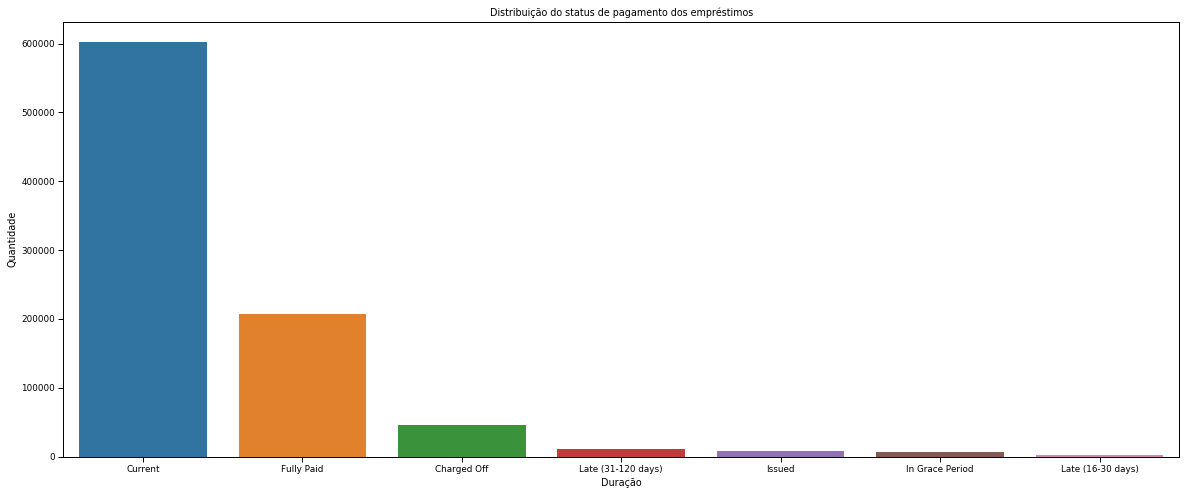

In [22]:
#distribuição do status de pagamentos dos empréstimos 
m =df_LC['loan_status'].value_counts().iloc[:7]
m = m.to_frame()
m.reset_index(inplace=True)
m.columns = ['Loan Status','Count']
plt.subplots(figsize=(20,8))
sns.barplot(y='Count', x='Loan Status', data=m)
plt.xlabel("Duração")
plt.ylabel("Quantidade")
plt.title("Distribuição do status de pagamento dos empréstimos")
plt.show()

Como podemos ver, nós temos vários empréstimos que ainda estão vigentes com uma quantidade razoável dos que já foram pagos 
em sua integralidade. Outras categorias, inclusive os calotes contém um valor muito baixo comparado com o total,  provavelmente porque o período de funcionamento do Lending Club é relativamente recente, a empresa foi fundada em 2006, comparado com as Instituições Brasileiras tradicionais é uma empresa nova. 
Então, vamos retirar todas as colunas exceto as que estão com pagamento total, cancelado e inadimplido. 
Também unindo as categorias cancelado e inadimplido juntas, já que quando nesta categoria, é porque não haverá pagamento.

In [46]:
dataset = dataset[~dataset['loan_status'].isin(['Issued',
                                 'Does not meet the credit policy. Status:Fully Paid',
                                 'Does not meet the credit policy. Status:Charged Off' ])]

In [48]:
def CreateDefault(Loan_Status):
    if Loan_Status in ['Current', 'Fully Paid', 'In Grace Period']:
        return 0
    else:
        return 1 
    
dataset['Default'] = dataset['loan_status'].apply(lambda x: CreateDefault(x))

In [38]:
print(Default)

0         0
1         1
2         0
3         0
4         0
5         0
6         0
7         0
8         1
9         1
10        0
11        0
12        1
13        0
14        1
15        0
16        0
17        0
18        0
19        0
20        0
21        1
22        0
23        0
24        1
25        0
26        1
27        1
28        0
29        0
         ..
887349    0
887350    0
887351    1
887352    0
887353    0
887354    0
887355    0
887356    0
887357    0
887358    0
887359    0
887360    0
887361    0
887362    0
887363    0
887364    0
887365    0
887366    0
887367    0
887368    0
887369    0
887370    0
887371    1
887372    0
887373    0
887374    0
887375    0
887376    0
887377    0
887378    0
Name: loan_status, Length: 876170, dtype: int64


In [33]:
dataset['grade'].value_counts().sort_index()

A    146656
B    251652
C    242759
D    137666
E     69576
F     22605
G      5256
Name: grade, dtype: int64

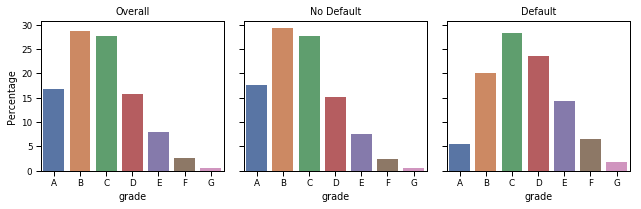

In [49]:
nNoLate = len(dataset[dataset['Default'] == 0])
nLate = len(dataset[dataset['Default'] == 1])

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(9, 3))

sns.barplot(x='grade', y='id', data=dataset, 
            estimator=lambda x: len(x) / (nLate + nNoLate) * 100,
            ax=ax1, order=sorted(dataset['grade'].unique()), palette='deep')
sns.barplot(x='grade', y='id', data=dataset[dataset['Default'] == 0], 
            estimator=lambda x: len(x) / nNoLate * 100,
            ax=ax2, order=sorted(dataset['grade'].unique()), palette='deep')
sns.barplot(x='grade', y='id', data=dataset[dataset['Default'] == 1], 
            estimator=lambda x: len(x) / nLate * 100,
            ax=ax3, order=sorted(dataset['grade'].unique()), palette='deep')

ax1.set_title('Overall')
ax2.set_title('No Default')
ax3.set_title('Default')
ax1.set_ylabel('Percentage')
ax2.set_ylabel('')
ax3.set_ylabel('')

plt.tight_layout()
plt.show()

A maior parte dos empréstimos está nos clientes risco B e C, no risco C a porcentagem de calote ou não está quase igualada, 
tendendo mais para o não-pagamento da dívida, o risco de calote nas classes D, E, F e G é muito alto em comparação com as 
outras classes. 

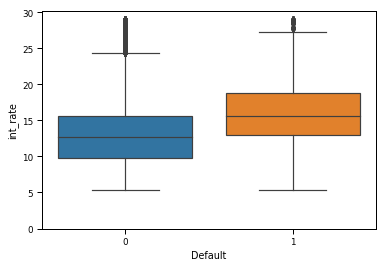

In [50]:
#comparando-se o valor da taxa de juros com o risco de calote, como era de se esperar, o risco de não pagamento dos empréstimos
#com taxa de juros mais alta é maior. 
ax1 = sns.boxplot(x='Default', y='int_rate', data=dataset)
ax1.set_ybound(lower=0)
plt.show()

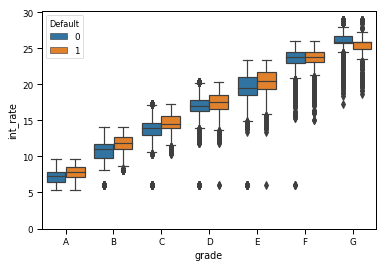

In [51]:
#relação entre os empréstimos não pagos com a taxa de juros, em todas as classes os empréstimos com taxa de juros maiores 
#sofreram mais calotes, nas classes F e G não houve relação direta dessa condição. 
ax1 = sns.boxplot(x='grade', y='int_rate', data=dataset, hue='Default', 
                     order=sorted(dataset['grade'].unique()))
ax1.set_ybound(lower=0)
plt.show()

In [ ]:
ax1 = sns.countplot(x='Default', hue='annual_inc', data=dataset)

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(x='annual_inc', y='Default', data=dataset, color='r', bins=20)
plt.title('Emissão de Empréstimos-média', fontsize=16)
plt.xlabel('Média empréstimos')
plt.ylabel('Quantidade de operações')

In [ ]:
#a variável DTI significa o valor da renda que a pessoa tem comprometida com prestações de empréstimo, 
#no caso da análise as pessoas com maior DTI tendem a dar calote, porém a diferença não é tão alta como 
#o esperado nesse caso. 
ax1 = sns.boxplot(x='Default', y='dti', data=dataset)
ax1.set_ybound(lower=0, upper=50)
plt.show()

In [ ]:
#a variável home_ownership avalia as pessoas que possuem casa própria (own), pagam aluguel (rent) ou mortgage(hipoteca), 
#as pessoas comprometidas 
nNoLate = len(dataset[dataset['Default'] == 0])
nLate = len(dataset[dataset['Default'] == 1])

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(9, 3))

sns.barplot(x='home_ownership', y='id', data=dataset, 
            estimator=lambda x: len(x) / (nLate + nNoLate) * 100,
            ax=ax1, order=['HIPOTECA', 'PRÓPRIO', 'ALUGADO'], palette='deep')
sns.barplot(x='home_ownership', y='id', data=dataset[dataset['Default'] == 0], 
            estimator=lambda x: len(x) / nNoLate * 100,
            ax=ax2, order=['MORTGAGE', 'OWN', 'RENT'], palette='deep')
sns.barplot(x='home_ownership', y='id', data=dataset[dataset['Default'] == 1], 
            estimator=lambda x: len(x) / nLate * 100,
            ax=ax3, order=['MORTGAGE', 'OWN', 'RENT'], palette='deep')

ax1.set_title('Overall')
ax2.set_title('No Default')
ax3.set_title('Default')
ax1.set_ylabel('Percentage')
ax2.set_ylabel('')
ax3.set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
nNoLate = len(dataset[dataset['Default'] == 0])
nLate = len(dataset[dataset['Default'] == 1])

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,10))

sns.barplot(x='emp_length', y='id', data=dataset, 
            estimator=lambda x: len(x) / (nLate + nNoLate) * 100,
            ax=ax1, palette='deep')
sns.barplot(x='emp_length', y='id', data=dataset[dataset['Default'] == 0], 
            estimator=lambda x: len(x) / nNoLate * 100,
            ax=ax2, palette='deep')
sns.barplot(x='emp_length', y='id', data=dataset[dataset['Default'] == 1], 
            estimator=lambda x: len(x) / nLate * 100,
            ax=ax3, palette='deep')

ax1.set_title('Overall')
ax2.set_title('No Default')
ax3.set_title('Default')
ax1.set_ylabel('Percentage')
ax2.set_ylabel('')
ax3.set_ylabel('')

plt.tight_layout()
plt.show()

Variáveis analisadas: tempo de emprego, renda comprometida com empréstimos, situação de moradia, taxa de juros, risco do cliente
Variáveis que podem ser incluídas: tipo de emprego, estado civil, filhos ou não.

Agora separando os dados usando o scikitlear train_test_split e usando 60% dos dados para treino e 40% para teste

In [97]:
numerical = df_LC.columns[df_LC.dtypes == 'float64']
for i in numerical:
    if df_LC[i].min() > 0:
        transformed, lamb = boxcox(df_LC.loc[dataset[i].notnull(), i])
        if np.abs(1 - lamb) > 0.02:
            df_LC.loc[dataset[i].notnull(), i] = transformed

In [99]:
df_LC = pd.get_dummies(df_LC, drop_first=True)

In [100]:
traindata, testdata = train_test_split(df_LC, stratify=df_LC['loan_status'],test_size=.4, random_state=17)
testdata.reset_index(drop=True, inplace=True)
traindata.reset_index(drop=True, inplace=True)